In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [116]:
#importing packages analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# importing packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [153]:
# Acquire data
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")

In [154]:
complete_data = [train_data, test_data]

In [155]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [156]:
# Categorical feature: Sex, embarked, ordinal:Pclass
# Numerical features: Continuous: age, Fare. Discrete: SibSp,Parch.
#Preview the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
# mixed data types: Numerical, alphanumeric data within same feature --- ticket is mix of numerical and alphanumeric and Cabin.
# Fetaures containing possible errors or types: Name

train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [158]:
# Feature contain blank, null or empty values -- Cabin, age
# Data types: 7 features are integer or floats and Six in test dataset, five features are string

train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [159]:
train_data.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

1. Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
2. Survived is a categorical feature with 0 or 1 values.
3. Around 38% samples survived representative of the actual survival rate at 32%.
4. Most passengers (> 75%) did not travel with parents or children.
5. Nearly 30% of the passengers had siblings and/or spouse aboard.
6. Fares varied significantly with few passengers (<1%) paying as high as $512.
7. Few elderly passengers (<1%) within age range 65-80.

In [160]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Foreman, Mr. Benjamin Laventall",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


What is the distribution of categorical features?

1. Names are unique across the dataset (count=unique=891)
2. Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
3. Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin.
4. Embarked takes three possible values. S port used by most passengers (top=S)
5. Ticket feature has high ration (22%) of duplicate values (unique=681)

The above assumtions based on data analysis done so far can be validated with different methods:

1. Correlating
We want to know how well does each feature corelates with Survival. We want to do this early in our project.

2. Completing
a. We may want to complete Age feature as it is definitley correlated to survival
b. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

3. Correcting
a. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
b. Ticket feature may be dropped from our analysis as it contains high ration of duplicates (22%) and there may not be a correlation between ticket and survival.
c. Name feature is relatively non-standard, may not contribute directly to survival.
d. PassengerId may be dropped from training dataset as it does not contribute to survival.

4. Creating
a. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
b. We can engineer the Name feature to extract title as a new feature.
c. We can create a new feature Age bands. This turns a continuous numerical feature into an ordinal categorical feature.
d. We can also create a Fare range feature if it helps our analysis.

5. Classifying
We can add to our assumptions based on the problem description noted earlier:
1. Women (sex= female) were more likely to have survived.
2. Children (Age<?) were more likely to have survuved.
3. The upper-class passengers (Pclass=1) were more likely to have survived.


Analyze by pivoting features

To confirm some of our observations and assumptions, we can quicky analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also make sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete(SibSp, Parch) type.

1. Pclass: We observe significant correlation (>0.5) among Pclass = 1 and Survived . We decide to include this feature in our model.
2. Sex: we confirm the observation during problem definition that sex = female had very high survival rate at 74%
3. SibSp and Parch: These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features

In [162]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [163]:
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [164]:
train_data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continuous numerical variables like Age where branding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands. (Did infants have better survival rate?)

Note that x-axis in histogram visualizations represents the count of samples or passengers.




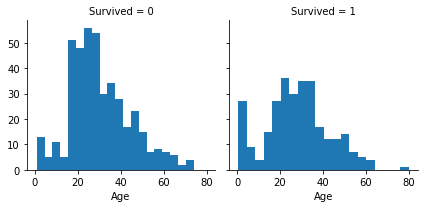

In [165]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Observations

1. infants (Age <= 4) had high survival rate.
2. Oldest passengers (Age=80) survived.
3. Large number of 15-25 year olds did not survive.
4. Most passengers are in 15-35 age range.

Decisions

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
1. We should consider Age  in our model training.
2. Complete the Age feature for null values.
3. We should band age groups

Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


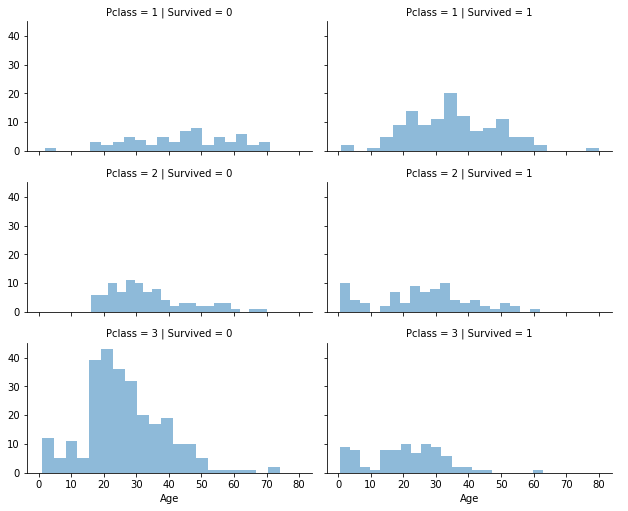

In [166]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.4, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Observation:
* Pclass=3 had most passengers, however most did not survive. 
* Infant passengers in Pclass2 and Pclass = 3 mostly survived.
* Most passenger in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers

Decisions
* Consider Pclass for model training.

Correlating categorical features

Now we can correlate categorical features with our solution goal.



/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


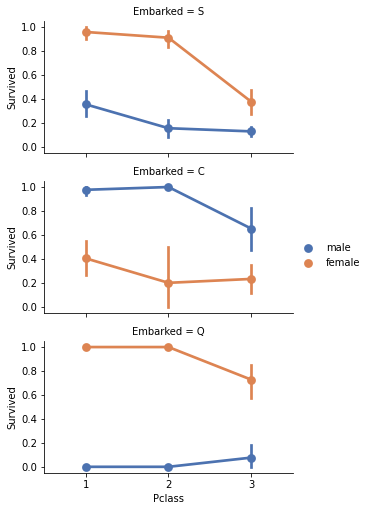

In [167]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.4, aspect=1.8)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

Observations.
* Female passengers had much better survival rate than males.
* Exception in Embarked = C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass = 3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

Decisions
* Add Sex feature to model training
* Complete and add Embarked feature to model training.

Correlating categoricfal and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


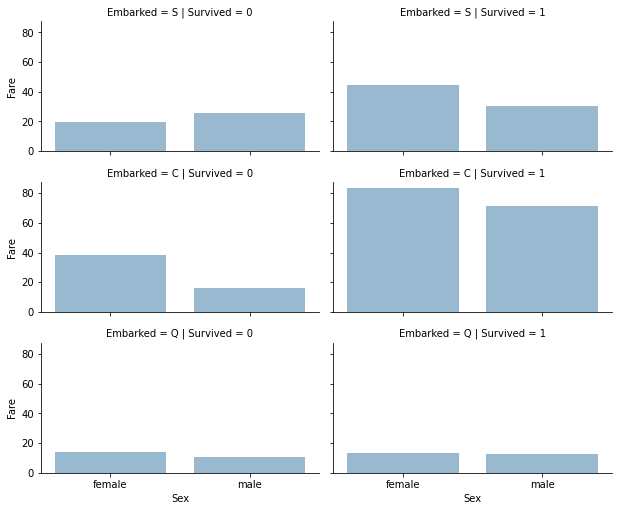

In [168]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.4, aspect=1.8)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Observations

* Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.
* Port of embarkation correlates with survival rates. 

Decisions
* Consider banding Fare feature.

Wrangle data

We have collected several assumptions and decisions reagrding our dataset and solution requirements. So far we have not changed a single feature or value to arrive at these. Let us now execute our  decisions and assumptions for correcting, creating, and completing goals. 

Correcting by dropping features

This is a good starting goal to execute. By dropping features we are daeling with fewer data ponts.

Based on our assumptions and decisions we want to drop the Cabin and Ticket features.

Note that where applicable we perform operations on both training and testing dataset together to stay consistent.


In [169]:
print('Before', train_data.shape, test_data.shape, complete_data[0].shape, complete_data[1].shape)

train_data =  train_data.drop(['Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Ticket','Cabin'], axis=1)
complete_data = [train_data, test_data]

print('After', train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 11) (418, 10)


Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between tiles and survival, before dropping Name and PassengerID features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character with Name fature. The expand=False flag returns a DataFrame.

In [170]:
for dataset in complete_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Observations
* Most titles band Age groups accurately. For example: Master title has Age mean of 5 years
* Survival among Title Age bands varies slightly
* Certain titles mostly survived(Mme, Lady, Sir) or did not (Don, Rev, Jonkheer),

Decision
* We decide to retain the new Title feature for model training.

In [171]:
# We can replace many tiles with a more common name or classify them as Rare.

for dataset in complete_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [172]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [173]:
# We can convert the categorical titles to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in complete_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [174]:
# Safely drop the Name feature from training and testing dataset. we also do not need PassengerId feature in the training dataset.

train_data = train_data.drop(['Name','PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis = 1)

In [175]:
complete_data = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

Converting a categorical feature

Now we can convert features which contains string to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female = 1 and male=0

In [176]:
for dataset in complete_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [177]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

* A simple way is to generate random numbers between mean and standard deviation.
* More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among age, gender, and Pclass. Guess Age values using median values for age across sets of Pclass and Gender feature combinations. So, median Age for Pclass =1 and Gender = 0, Pclass = 1 and Gender =1 and so on..
* Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


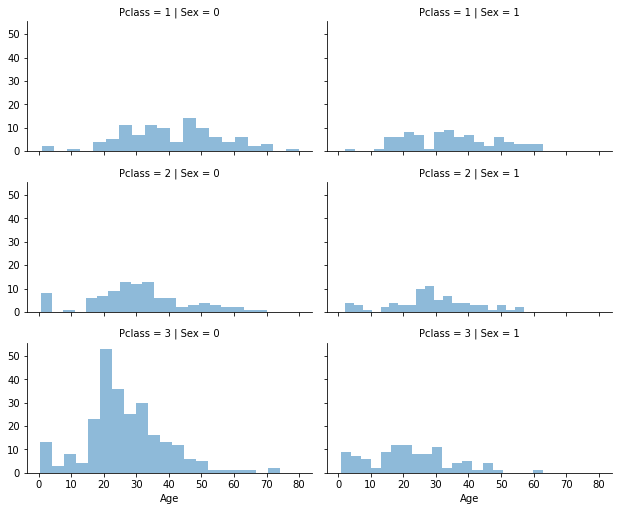

In [178]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.4, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [179]:
# Start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [180]:
# Now we iterate over sex(0 or 1) and Pclass(1,2,3) to calculate guessed values of Age for the six combinations.

for dataset in complete_data:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            #Convert random age float to neareast .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
         for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [181]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [182]:
# create Age bands and determine correlations with Survived

train_data['AgeBand'] = pd.cut(train_data['Age'],5)
train_data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [183]:
# Replace Age with ordinals based on these bands.

for dataset in complete_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']


In [184]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [185]:
# remove the AgeBand feature.

train_data = train_data.drop(['AgeBand'], axis=1)
complete_data = [train_data,test_data]

In [186]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Porch and SibSp from our datasets.

In [187]:
for dataset in complete_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [188]:
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [189]:
# Create another feature called IsAlone
for dataset in complete_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [190]:
# Drop Parch, SibSp and FamilySize features in favor of IsAlone
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
complete_data = [train_data, test_data]

train_data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [191]:
# create an artificial feature combining Pclass and Age
for dataset in complete_data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Completing a categorical feature

Embarked feature takes S,Q,C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [192]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [193]:
for dataset in complete_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [194]:
for dataset in complete_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


Quick completing and converting a numeric feature

We can now complete the Fare Feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [195]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [197]:
# can create FareBand
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [198]:
# convert the Fare feature to ordinal values based on the FareBand.
for dataset in complete_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [ ]:
test_data.head(10)